1) Create an exploratory data analysis notebook.

In [2]:
#Import Pandas ad pd and Matplotlib as plt

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2)Perform statistical analysis, along with any visualizations.

In [7]:
#Read food inspection data 

#Assign the data set to the data frame 'inspections' 

inspections_path = Path('data', 'Food_Inspections.csv')

inspections = pd.read_csv(inspections_path, header=0)


#Replace spaces in column names with '_' character

inspections.columns = inspections.columns.str.replace(' ', '_')

#Replace special character in violations columns with ':::'. This is being done in order to count number of violations per restaurant in the future
inspections.loc[:,'Violations_New'] = inspections.loc[:,'Violations'].str.replace('|', ':::')

#Assign a numerical value to the categorical values in 'Risk' for future analysis
inspections.loc[:, 'Risk_Number'] = inspections.loc[:, 'Risk'].map({'Risk 1 (High)':1, 'Risk 2 (Medium)':2, 'Risk 3 (Low)':3,'All':4})

#Assign a numerical value to the categorical values in 'Results' for future analysis
inspections.loc[:, 'Results_Number'] = inspections.loc[:, 'Results'].map({'Pass':1, 'Fail':2, 'Pass w/ Conditions':3, 'Out of Business':4, 'No Entry':5, 'Not Ready':6, 'Business Not Located':7})


#Count number of times ':::' occurs in Violations columns
v = inspections.Violations_New.str.count(":::")

#add 1 to the count of ':::' assigned to variable 'v'
Total_Violations = v + 1.0

#assign total violations count to a new column

inspections.loc[:, 'Num_Of_Violations'] = Total_Violations

#replace null values with 0

inspections['Num_Of_Violations'].fillna(0, inplace=True)


#View the first 5 rows of the dataset
inspections.head()

#inspections.to_csv('output.csv', encoding='utf-8')


,Inspection_ID,DBA_Name,AKA_Name,License_#,Facility_Type,Risk,Address,City,State,Zip,...,Inspection_Type,Results,Violations,Latitude,Longitude,Location,Violations_New,Risk_Number,Results_Number,Num_Of_Violations
0,2232337,PR ITALIAN BISTRO,PR ITALIAN BISTRO,2094560.0,Restaurant,Risk 1 (High),3908-3910 N SHERIDAN RD,CHICAGO,IL,60613.0,...,Short Form Complaint,Pass,NaN,41.952964,-87.654647,"(41.95296441761877, -87.65464669411456)",NaN,1.0,1,0.0
1,2232323,DON FRESCO,DON FRESCO,2411114.0,Restaurant,Risk 1 (High),520 W HARRISON ST,CHICAGO,IL,60607.0,...,Complaint,Fail,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.874505,-87.640466,"(41.874504999844035, -87.64046641424397)",2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,1.0,2,12.0
2,2232322,FRIO GELATO,FRIO GELATO,2631305.0,Restaurant,Risk 2 (Medium),5152 N CLARK ST,CHICAGO,IL,60640.0,...,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.975946,-87.668541,"(41.97594583977759, -87.66854079443198)","3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",2.0,3,7.0
3,2232317,MAGIC JOHNSON BRIDGESCAPE ACADEMY,MAGIC JOHNSON BRIDGESCAPE ACADEMY,3428073.0,School,Risk 3 (Low),10928 S HALSTED ST,CHICAGO,IL,60628.0,...,Canvass Re-Inspection,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.695114,-87.642611,"(41.695113521218175, -87.64261132457379)",51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,3.0,1,3.0
4,2232315,DOLLOP COFFEE BAR,DOLLOP COFFEE BAR,2616615.0,Restaurant,Risk 2 (Medium),853 N LARRABEE ST,CHICAGO,IL,60610.0,...,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.898035,-87.642845,"(41.89803544757322, -87.64284538924244)","3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",2.0,3,1.0


In [8]:
#Check the number of rows and columns.

inspections.shape

(177094, 21)

In [9]:
#Check the data type of each column.
inspections.dtypes

Inspection_ID          int64
DBA_Name              object
AKA_Name              object
License_#            float64
Facility_Type         object
Risk                  object
Address               object
City                  object
State                 object
Zip                  float64
Inspection_Date       object
Inspection_Type       object
Results               object
Violations            object
Latitude             float64
Longitude            float64
Location              object
Violations_New        object
Risk_Number          float64
Results_Number         int64
Num_Of_Violations    float64
dtype: object

In [10]:
#basic satistical analysis of numerical values
inspections.describe()

,Inspection_ID,License_#,Zip,Latitude,Longitude,Risk_Number,Results_Number,Num_Of_Violations
count,1.770940e+05,1.770780e+05,177018.000000,176436.000000,176436.000000,177024.000000,177094.000000,177094.000000
mean,1.356635e+06,1.561461e+06,60629.005559,41.880760,-87.676483,1.383084,1.831039,3.064090
std,6.024909e+05,8.886373e+05,22.693713,0.080794,0.058908,0.647562,1.186676,2.886698
min,4.424700e+04,0.000000e+00,60007.000000,41.644670,-87.914428,1.000000,1.000000,0.000000
25%,1.099221e+06,1.168589e+06,60614.000000,41.832016,-87.707600,1.000000,1.000000,0.000000
50%,1.439552e+06,1.953529e+06,60625.000000,41.891689,-87.666350,1.000000,1.000000,3.000000
75%,1.948876e+06,2.208690e+06,60643.000000,41.939669,-87.634804,2.000000,2.000000,5.000000
max,2.238212e+06,9.999999e+06,60827.000000,42.021064,-87.525094,4.000000,7.000000,34.000000


In [11]:
#basic satistical analysis of object values

inspections.describe(include=['object'])

,DBA_Name,AKA_Name,Facility_Type,Risk,Address,City,State,Inspection_Date,Inspection_Type,Results,Violations,Location,Violations_New
count,177094,174657,172386,177024,177094,176939,177062,177094,177093,177094,129619,176436,129619
unique,26282,25098,463,4,17633,62,1,2241,108,7,128882,16440,128882
top,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,11/14/2013,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(42.008536400868735, -87.91442843927047)",32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...
freq,2465,2976,117601,125384,2289,176295,177062,185,93587,101666,11,2300,11


In [12]:
#Count number of instances per risk category

inspections.loc[:,'Risk'].value_counts()

Risk 1 (High)      125384
Risk 2 (Medium)     35488
Risk 3 (Low)        16129
All                    23
Name: Risk, dtype: int64

In [14]:
#Count number of instances per results category

inspections.loc[:,'Results'].value_counts()

Pass                    101666
Fail                     34315
Pass w/ Conditions       18792
Out of Business          15521
No Entry                  5353
Not Ready                 1384
Business Not Located        63
Name: Results, dtype: int64

In [15]:
#Count number of instances per facility type category


inspections.loc[:,'Facility_Type'].value_counts().head()

Restaurant               117601
Grocery Store             23140
School                    10972
Bakery                     2605
Daycare (2 - 6 Years)      2543
Name: Facility_Type, dtype: int64

#Count number of instances per inspectiont type

In [16]:
inspections.loc[:,'Inspection_Type'].value_counts().head()

Canvass                  93587
License                  23070
Canvass Re-Inspection    18451
Complaint                16415
License Re-Inspection     8179
Name: Inspection_Type, dtype: int64

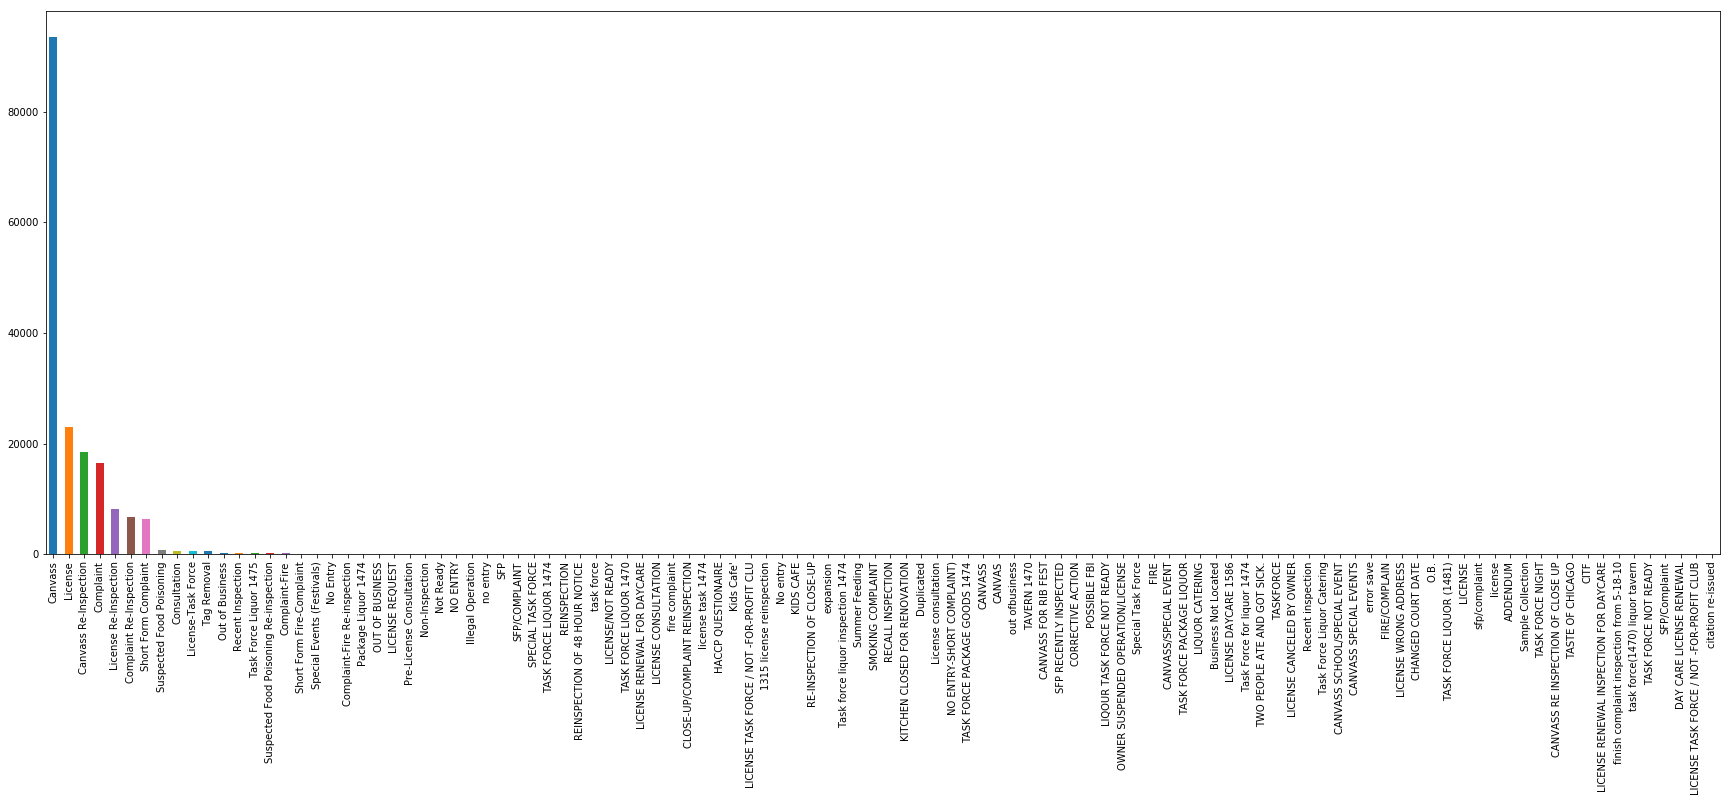

In [17]:
#vizualize frequency of count by inspection type
inspections.loc[:,'Inspection_Type'].value_counts().plot(kind='bar',figsize=(30, 10))

In [18]:
#parse out only restaurant inspections and set to new data frame
r_inspections = inspections.loc[inspections['Facility_Type'] == 'Restaurant']

#count number of inspection types
counts = r_inspections.loc[:,'Inspection_Type'].value_counts()

#filter for list of inspection types with 100 or more values assigned to them
top = counts[counts >= 100].index

#parse out restaurants with 100 or more inspection type values assigned to them
restaurants = r_inspections[r_inspections.Inspection_Type.isin(top)]


#check work - count the number of inspection types
restaurants.loc[:,'Inspection_Type'].value_counts()

#check work - count the number of restaurants
#restaurants.loc[:,'Facility_Type'].value_counts()

Canvass                                   62667
Complaint                                 12689
Canvass Re-Inspection                     12626
License                                   12549
Complaint Re-Inspection                    4963
Short Form Complaint                       4810
License Re-Inspection                      4421
Suspected Food Poisoning                    671
Tag Removal                                 482
Consultation                                391
License-Task Force                          291
Task Force Liquor 1475                      212
Recent Inspection                           191
Suspected Food Poisoning Re-inspection      153
Complaint-Fire                              127
Name: Inspection_Type, dtype: int64

In [19]:
#count number of nulls per column
restaurants.isnull().sum()

Inspection_ID            0
DBA_Name                 0
AKA_Name              1138
License_#                0
Facility_Type            0
Risk                     1
Address                  0
City                    79
State                   13
Zip                     32
Inspection_Date          0
Inspection_Type          0
Results                  0
Violations           28391
Latitude               171
Longitude              171
Location               171
Violations_New       28391
Risk_Number              1
Results_Number           0
Num_Of_Violations        0
dtype: int64

In [20]:
#inspect column nulls

restaurants.loc[restaurants.loc[:, 'Risk'].isnull(), :]


,Inspection_ID,DBA_Name,AKA_Name,License_#,Facility_Type,Risk,Address,City,State,Zip,...,Inspection_Type,Results,Violations,Latitude,Longitude,Location,Violations_New,Risk_Number,Results_Number,Num_Of_Violations
92913,1459985,GREENLINE COFFEE,GREENLINE COFFEE,2333150.0,Restaurant,NaN,501 E 61ST ST,CHICAGO,IL,60637.0,...,License,Fail,NaN,41.783819,-87.613189,"(41.783819303359486, -87.6131888960692)",NaN,NaN,2,0.0


In [21]:
#add up number of duplicates
restaurants.duplicated().sum()

0

In [22]:
#basic satistical analysis of numerical values

restaurants.describe()

,Inspection_ID,License_#,Zip,Latitude,Longitude,Risk_Number,Results_Number,Num_Of_Violations
count,1.172430e+05,1.172430e+05,117211.000000,117072.000000,117072.000000,117242.000000,117243.000000,117243.000000
mean,1.395977e+06,1.605830e+06,60628.885941,41.888823,-87.675296,1.211750,1.824911,3.256288
std,5.899617e+05,8.475453e+05,19.387808,0.075312,0.059610,0.432504,1.185416,2.929409
min,4.424700e+04,0.000000e+00,60601.000000,41.644670,-87.914428,1.000000,1.000000,0.000000
25%,1.138916e+06,1.277374e+06,60613.000000,41.854334,-87.703585,1.000000,1.000000,1.000000
50%,1.464446e+06,1.959834e+06,60625.000000,41.894976,-87.663164,1.000000,1.000000,3.000000
75%,1.954136e+06,2.197158e+06,60644.000000,41.940653,-87.634022,1.000000,2.000000,5.000000
max,2.238212e+06,2.653709e+06,60827.000000,42.020808,-87.525094,4.000000,7.000000,34.000000


In [23]:
#basic satistical analysis of object values

restaurants.describe(include=['object'])

,DBA_Name,AKA_Name,Facility_Type,Risk,Address,City,State,Inspection_Date,Inspection_Type,Results,Violations,Location,Violations_New
count,117243,116105,117243,117242,117243,117164,117230,117243,117243,117243,88852,117072,88852
unique,13323,12799,1,4,9626,9,1,2210,15,7,88396,9143,88396
top,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,11/14/2013,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(42.008536400868735, -87.91442843927047)",32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...
freq,2432,2941,117243,93592,2014,116926,117230,119,62667,67734,10,2014,10


In [24]:
#correlation between numerical values
restaurants.corr()

,Inspection_ID,License_#,Zip,Latitude,Longitude,Risk_Number,Results_Number,Num_Of_Violations
Inspection_ID,1.000000,0.202689,0.007594,0.047445,-0.004403,-0.049102,0.149871,-0.020857
License_#,0.202689,1.000000,0.001091,-0.012682,0.034137,0.044279,0.055333,-0.103037
Zip,0.007594,0.001091,1.000000,0.216831,-0.433659,-0.006512,0.025270,0.025414
Latitude,0.047445,-0.012682,0.216831,1.000000,-0.397759,-0.131712,0.019121,0.007358
Longitude,-0.004403,0.034137,-0.433659,-0.397759,1.000000,0.007999,0.002733,-0.026404
Risk_Number,-0.049102,0.044279,-0.006512,-0.131712,0.007999,1.000000,0.012224,-0.113054
Results_Number,0.149871,0.055333,0.025270,0.019121,0.002733,0.012224,1.000000,-0.086097
Num_Of_Violations,-0.020857,-0.103037,0.025414,0.007358,-0.026404,-0.113054,-0.086097,1.000000


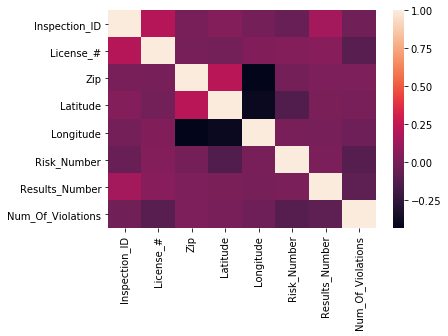

In [25]:
#correlation between numerical values
ax = sns.heatmap(restaurants.corr());

In [26]:
#covariance between numercial variables
restaurants.cov()

,Inspection_ID,License_#,Zip,Latitude,Longitude,Risk_Number,Results_Number,Num_Of_Violations
Inspection_ID,3.480548e+11,1.013486e+11,86859.854238,2108.209564,-154.844416,-12528.925983,104812.612477,-36046.166879
License_#,1.013486e+11,7.183330e+11,17923.820847,-809.624529,1724.940945,16231.305830,55592.387710,-255820.433289
Zip,8.685985e+04,1.792382e+04,375.887093,0.316604,-0.501188,-0.054577,0.580714,1.443378
Latitude,2.108210e+03,-8.096245e+02,0.316604,0.005672,-0.001786,-0.004289,0.001707,0.001624
Longitude,-1.548444e+02,1.724941e+03,-0.501188,-0.001786,0.003553,0.000206,0.000193,-0.004611
Risk_Number,-1.252893e+04,1.623131e+04,-0.054577,-0.004289,0.000206,0.187060,0.006267,-0.143237
Results_Number,1.048126e+05,5.559239e+04,0.580714,0.001707,0.000193,0.006267,1.405211,-0.298979
Num_Of_Violations,-3.604617e+04,-2.558204e+05,1.443378,0.001624,-0.004611,-0.143237,-0.298979,8.581439


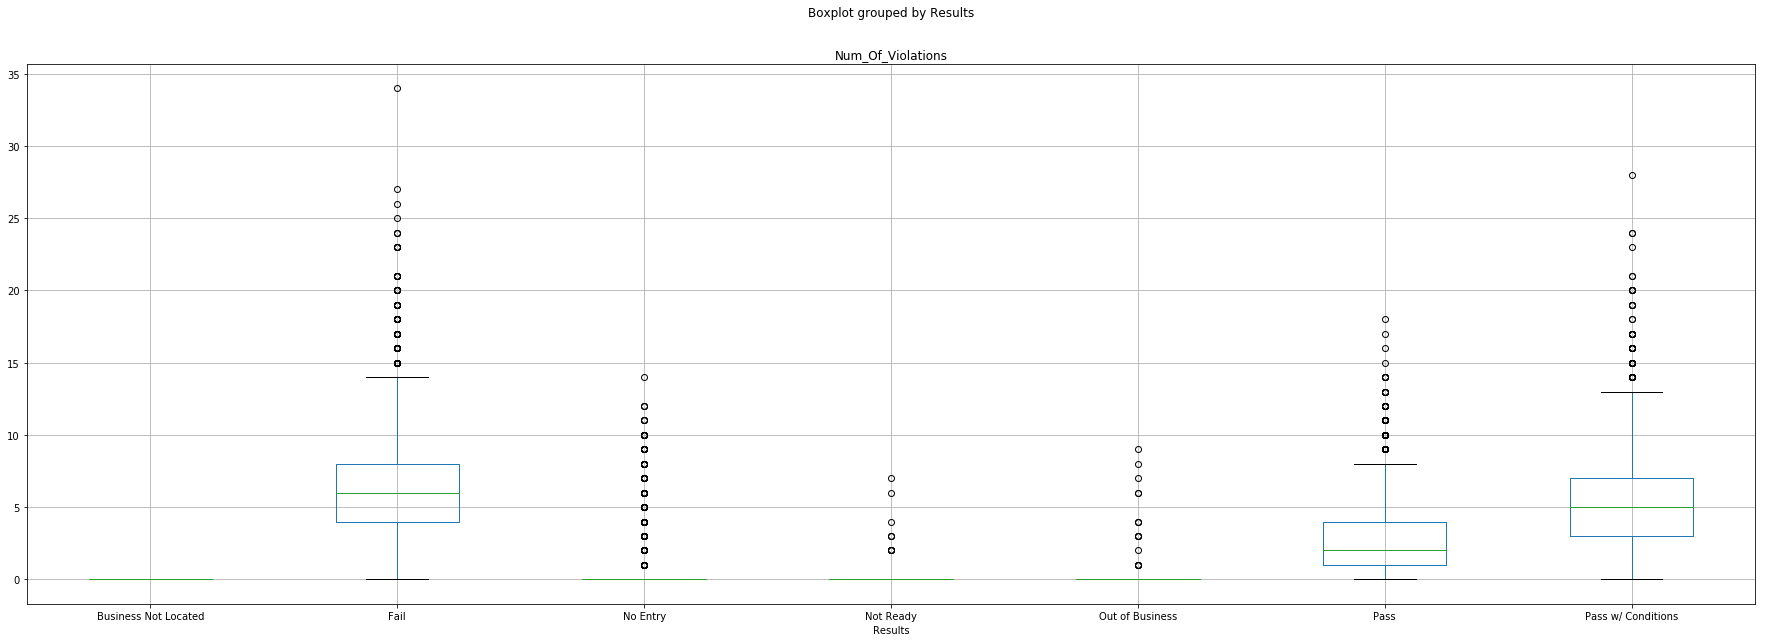

In [27]:
#boxplot of number of violations by results 

ax = restaurants.boxplot(column=['Num_Of_Violations'], by='Results',figsize=(30,10))
ax

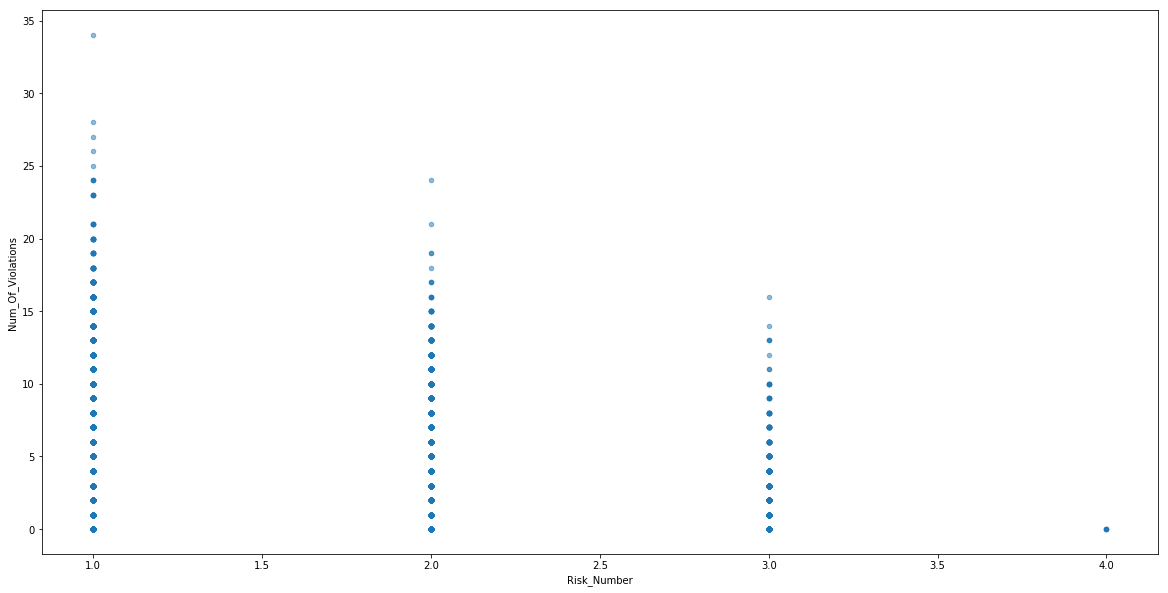

In [28]:
#scatter plot of risk number by number of violations
ax_1 = restaurants.plot.scatter(x='Risk_Number', y='Num_Of_Violations', alpha=.5,figsize=(20,10))


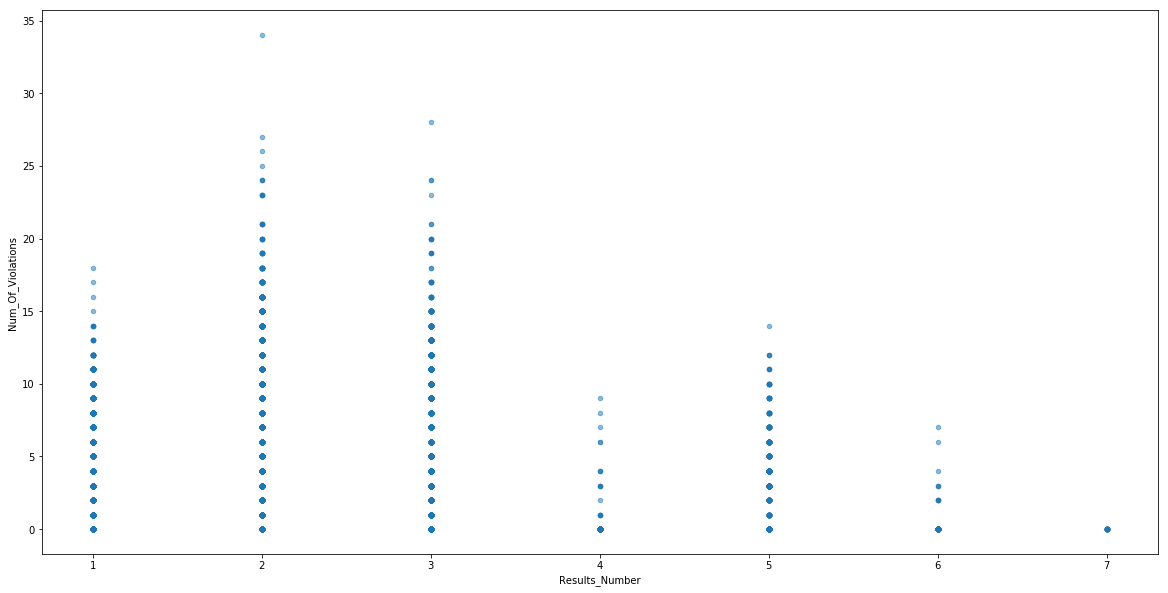

In [29]:
#scatter plot of results by number of violations
ax_2 = restaurants.plot.scatter(x='Results_Number', y='Num_Of_Violations', alpha=.5,figsize=(20,10))


In [30]:
#checking data types of restaurant subset data

restaurants.dtypes

Inspection_ID          int64
DBA_Name              object
AKA_Name              object
License_#            float64
Facility_Type         object
Risk                  object
Address               object
City                  object
State                 object
Zip                  float64
Inspection_Date       object
Inspection_Type       object
Results               object
Violations            object
Latitude             float64
Longitude            float64
Location              object
Violations_New        object
Risk_Number          float64
Results_Number         int64
Num_Of_Violations    float64
dtype: object

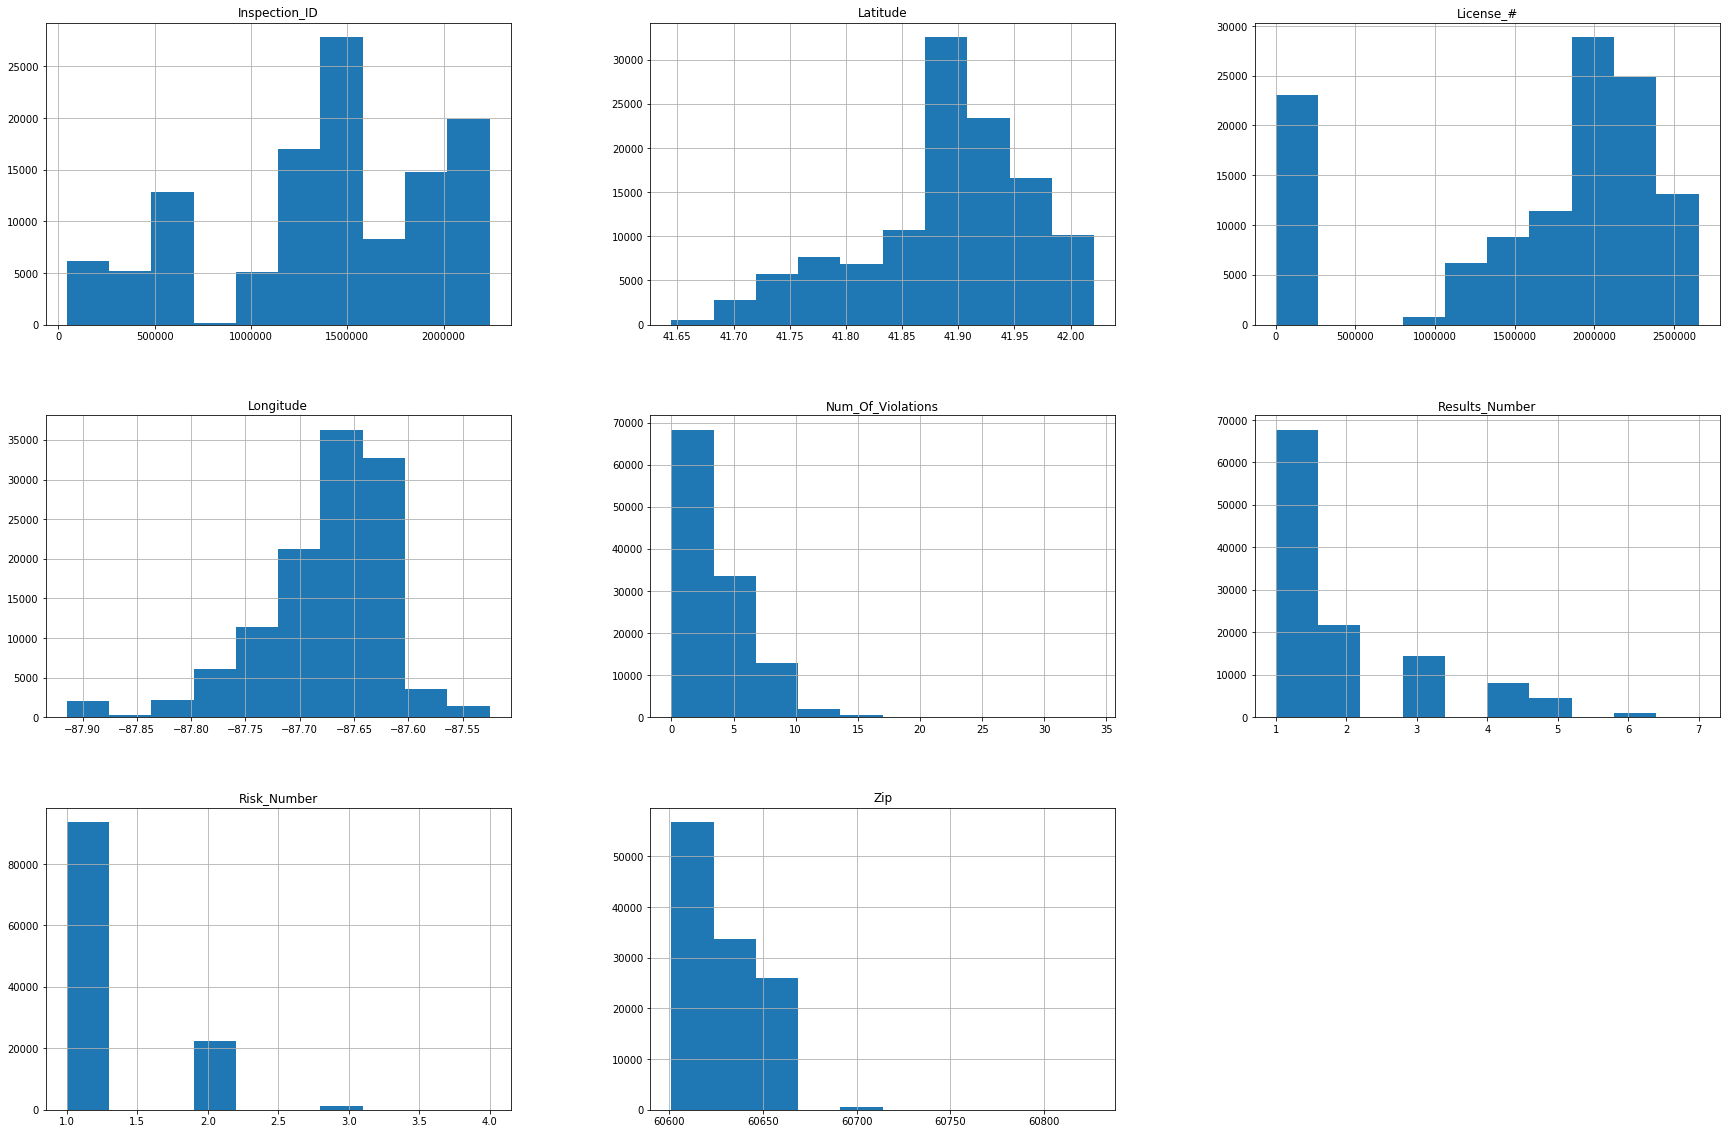

In [31]:
#distribution of numerical values
axes = restaurants.hist(figsize=(30, 20), bins=10)

3)Determine how to handle sampling or missing values.

There is a large sample size, however, there are multiple categorical data flaws. Primarily, inaccurate inspection types that deviated from
acceptable responsed muddled the data. However, I dropped this data in order to accurate inspection type data. Additionaly, my categorical
values need to be mapped to numerical variables for comparison. 

Missing values will either be dropped, or assigned a null value, if they don't apply to the anaysis. An example of this
is the calculation for Number of violations. (inspections['Num_Of_Violations'].fillna(0, inplace=True)


4)Clearly identify shortcomings, assumptions, and next steps.

Shortcomings: 
    Number of violations will have to be paired with other cofounding variables in order to predict if a business will shut down
    All of my contextual values will have to mapped to numerical values
    
Assumptions:
    All data from 2010 - present will be used to predict if a  business will shut down 
    Only data from Chicago restaurants will be used (all data from other establishments will be parsed out
    Number of violations per restaurant is a calculation and not a given numercial value in the data set
    
    
Next Steps:
    Consider contextual variables (text analysis of violations) and potentially geo location data to back into predictions
    Consider other numerical variables in my prediction
    Begin model analysis
    Continue with further EDA(text analysis)
    
    